In [36]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import plotly.express as px

In [37]:
# loading the data
data1 = np.load("hw5_data_1.npy")
data2 = np.load("hw5_data_2.npy")
data3 = np.load("hw5_data_3.npy")

## Part 1

Info data1:

1) data1 = 2000 by 2 <br>
2) 0 to 1000 belong to cluster 0 <br>
3) 1000 to 2000 belong to cluster 1 <br>

Use the built-in KMeans toolbox to apply K-Means clustering to
this data. Use the confusion_matrix function to determine how good
your fit is. Your only goal here is to practice using the built-in toolboxes.

In [38]:
resultData1 = KMeans(n_clusters=2, random_state=0).fit(data1)

In [39]:
c = np.append(np.zeros(1000),np.ones(1000, dtype=int))

[[997   3]
 [176 824]]


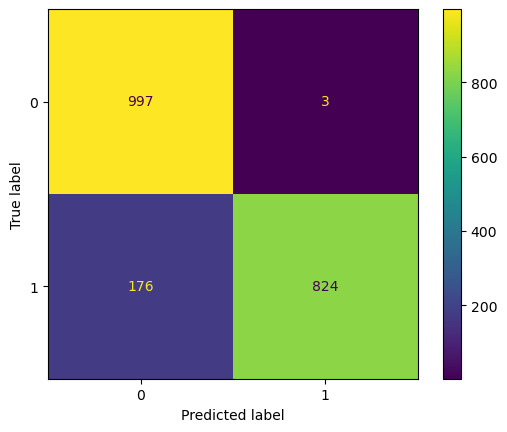

In [40]:
cm = confusion_matrix(c , resultData1.labels_)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

## Part 2

Steps that I am taking to solve this problem
1. Plot the data to get an idea of what I am dealing with
2. Reduce the dimensions of the data by using PCA
3. Apply Kmeans techinque
4. Plot the data

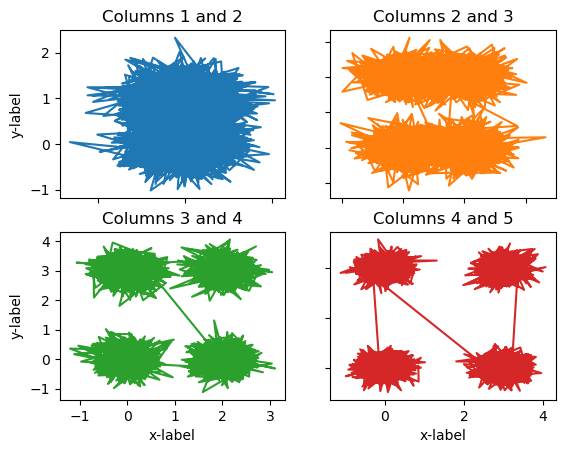

In [41]:
# Extracting the columns from the data
a = data2[:, 0]
b = data2[:, 1]
c = data2[:, 2]
d = data2[:, 3]
e = data2[:, 4]

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(a, b)
axs[0, 0].set_title('Columns 1 and 2')
axs[0, 1].plot(b, c, 'tab:orange')
axs[0, 1].set_title('Columns 2 and 3')
axs[1, 0].plot(c, d, 'tab:green')
axs[1, 0].set_title('Columns 3 and 4')
axs[1, 1].plot(d, e, 'tab:red')
axs[1, 1].set_title('Columns 4 and 5')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

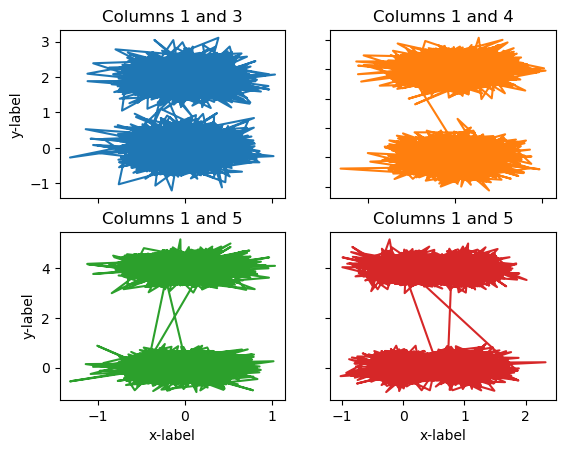

In [42]:
fig1, axs1 = plt.subplots(2, 2)
axs1[0, 0].plot(a, c)
axs1[0, 0].set_title('Columns 1 and 3')
axs1[0, 1].plot(a, d, 'tab:orange')
axs1[0, 1].set_title('Columns 1 and 4')
axs1[1, 0].plot(a, e, 'tab:green')
axs1[1, 0].set_title('Columns 1 and 5')
axs1[1, 1].plot(b, e, 'tab:red')
axs1[1, 1].set_title('Columns 1 and 5')

for ax in axs1.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs1.flat:
    ax.label_outer()

In [43]:
#  Trying out plotly
pdData = {'Column1': a, 'Column2': b, 'Column3': c}
df = pd.DataFrame(data=pdData)
fig = px.scatter_3d(df, x='Column1', y='Column2', z='Column3')
fig.show()

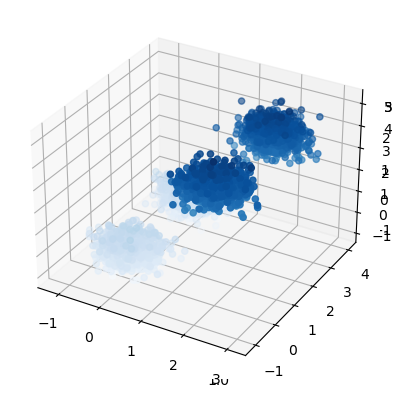

In [44]:
# This graphs do not really tell me much
ax = plt.axes(projection='3d')
ax.scatter3D(a, b, c, c=c, cmap='Greens');
ax1 = plt.axes(projection='3d')
ax1.scatter3D(c, d, e, c=e, cmap='Blues');

From the graphs above (specially the 2d graphs), it looks like there are 4 clusters.
Some of the clusters are closer to each other which might lead to a lot of overlap,
but 4 clusters is a good assumption.

In [45]:
"""
resultData1 = KMeans(n_clusters=4, random_state=0).fit(data2)
print("Unique values after Kmeans ", np.unique(resultData1.labels_))
print(resultData1.labels_[0:5])
print(resultData1.labels_[1000:1005])
print(resultData1.labels_[2000:2005])
print(resultData1.labels_[3000:3005])

c = np.append(np.full((1000,1), 2), np.full((1000,1), 3))
c = np.append(c, np.full((1000,1), 0))
c = np.append(c, np.full((1000,1), 1))
print(c.shape)

cmA = confusion_matrix(a , resultData1.labels_)
print(cmA)
cmA_display = ConfusionMatrixDisplay(cmA).plot()
"""

'\nresultData1 = KMeans(n_clusters=4, random_state=0).fit(data2)\nprint("Unique values after Kmeans ", np.unique(resultData1.labels_))\nprint(resultData1.labels_[0:5])\nprint(resultData1.labels_[1000:1005])\nprint(resultData1.labels_[2000:2005])\nprint(resultData1.labels_[3000:3005])\n\nc = np.append(np.full((1000,1), 2), np.full((1000,1), 3))\nc = np.append(c, np.full((1000,1), 0))\nc = np.append(c, np.full((1000,1), 1))\nprint(c.shape)\n\ncmA = confusion_matrix(a , resultData1.labels_)\nprint(cmA)\ncmA_display = ConfusionMatrixDisplay(cmA).plot()\n'

In [46]:
pca = PCA(2)
df = pca.fit_transform(data2)
df.shape

(4000, 2)

In [47]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(df)
print(label)

[1 1 1 ... 0 0 0]


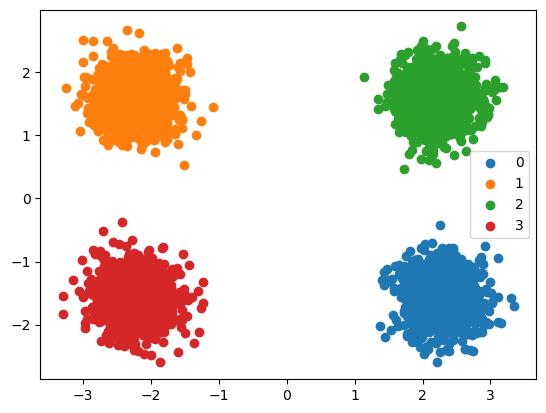

In [48]:
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

Successfully reduced the data to 2 dimensions and then applied
the clustering technique to correctly identify the 4 clusters.

## Part 3

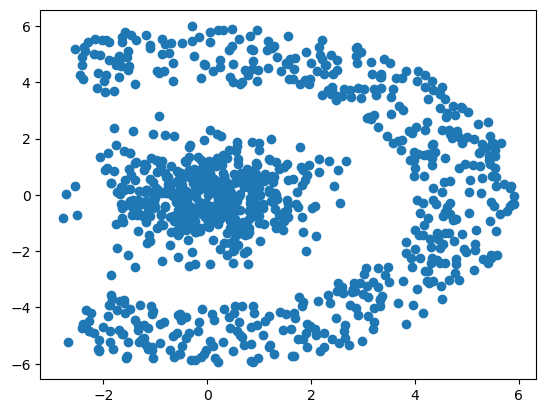

In [49]:
plt.scatter(data3[:,0], data3[:,1])
plt.show()

In [50]:
resultData3 = KMeans(n_clusters=2, random_state=0).fit(data3)

In [51]:
c = np.append(np.zeros(1000),np.ones(1000, dtype=int))

[[997   3]
 [176 824]]


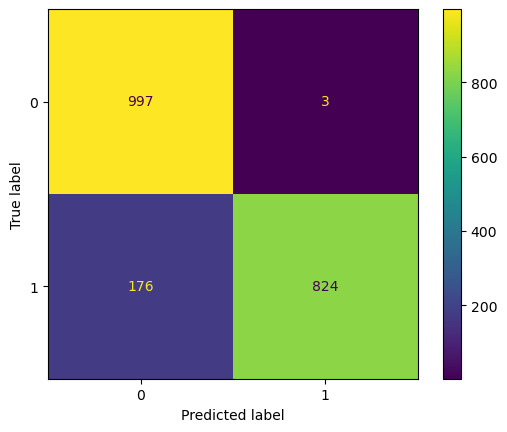

In [52]:
cm = confusion_matrix(c , resultData1.labels_)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

It is possible to see from the confusion matrix shown above that one cluster, was properly accounted
for, but the other cluster, the program had trouble labeling it. I believe this is due to the shape
of the cluster. Typically a cluster would have a circle like shape, so the outer cluster shown
in the image above is making the program label incorrectly the data points that are closer to the
inner cluster.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


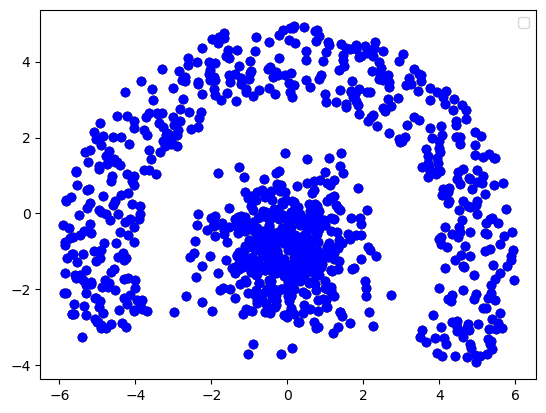

In [53]:
# Test 1
pca = PCA(2)
X_r = pca.fit(data3).transform(data3)

plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
   plt.scatter(X_r[:,0], X_r[:,1], c=c)
plt.legend()
plt.show()

In [54]:
# Test 2
pca = PCA(2)
df = pca.fit_transform(data3)

In [55]:
kmeans = KMeans(n_clusters = 2)
label = kmeans.fit_predict(df)

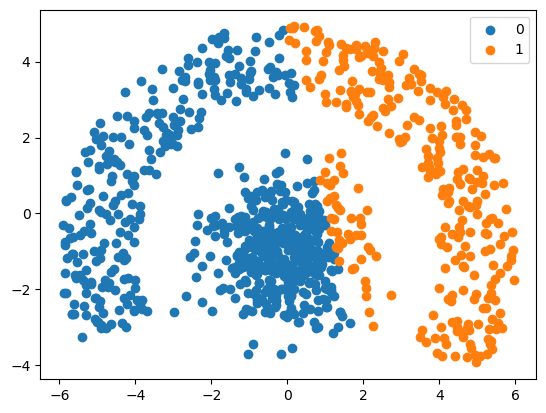

In [56]:
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

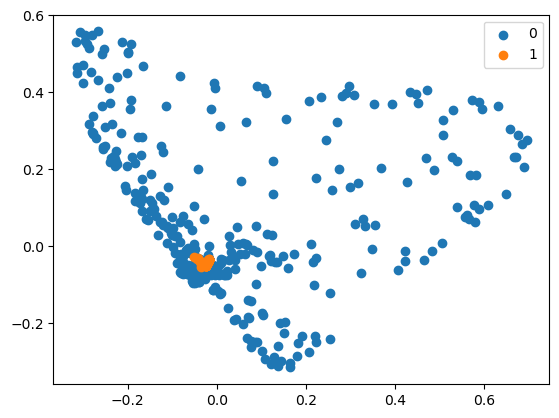

In [59]:
# Test 3
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)
X_test_kernel_pca = kernel_pca.fit(data3).transform(data3)

U_labels = np.unique(X_test_kernel_pca)
for i in u_labels:
    plt.scatter(X_test_kernel_pca[label == i , 0] , X_test_kernel_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

I dont think I am getting the correct results. It can definitely still perform better. Overall, the PCA
algorithm works pretty well. 